In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [130]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_config
from src.vit_cluster_train import ViTDeepClusterTrainer
from src.vit_data_clustering import ViTDataDeepClustering
from src.vit_data import load_cell_cycle_data
import importlib

config_name = 'deep_clustering'
config = importlib.import_module(f"config.{config_name}")

vit = load_model_config(config)
vit_data = load_cell_cycle_data(config.REPLICATE_MODE, config.CHANNEL_1, config.PREDICT_TPM, 
                                init_class=ViTDataDeepClustering, debug_n=100)
times = sorted(list(set(vit_data.times)))
    

In [131]:
from torch import nn

dataloader = ViTDataLoader(vit_data, batch_size=config.BATCH_SIZE, 
            split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG,
            valid_type=config.VALIDATION_TYPE, valid_arg=config.VALIDATION_ARG)

trainer = ViTDeepClusterTrainer(vit, config_name, dataloader, resume=False, resume_path=None, debug=True,
                                criterion=nn.MultiLabelSoftMarginLoss)

NameError: name 'get_device' is not defined

In [122]:
trainer.setup()

Directory exists. Skipping.


[11] 0.564 loss, 0: 21/100 (21%), 1: 22/100 (22%), 2: 33/100 (33%), 3: 24/100 (24%)
[21] 0.564 loss, 0: 21/100 (21%), 1: 27/100 (27%), 2: 22/100 (22%), 3: 30/100 (30%)
[31] 0.560 loss, 0: 19/100 (19%), 1: 22/100 (22%), 2: 24/100 (24%), 3: 35/100 (35%)
[41] 0.559 loss, 0: 20/100 (20%), 1: 28/100 (28%), 2: 20/100 (20%), 3: 32/100 (32%)
[51] 0.561 loss, 0: 22/100 (22%), 1: 34/100 (34%), 2: 15/100 (15%), 3: 29/100 (29%)
[61] 0.554 loss, 0: 35/100 (35%), 1: 16/100 (16%), 2: 30/100 (30%), 3: 19/100 (19%)
[71] 0.554 loss, 0: 16/100 (16%), 1: 24/100 (24%), 2: 17/100 (17%), 3: 43/100 (43%)
[81] 0.563 loss, 0: 22/100 (22%), 1: 33/100 (33%), 2: 10/100 (10%), 3: 35/100 (35%)
[91] 0.556 loss, 0: 18/100 (18%), 1: 26/100 (26%), 2: 17/100 (17%), 3: 39/100 (39%)
[101] 0.566 loss, 0: 23/100 (23%), 1: 30/100 (30%), 2: 28/100 (28%), 3: 19/100 (19%)
[111] 0.563 loss, 0: 31/100 (31%), 1: 21/100 (21%), 2: 29/100 (29%), 3: 19/100 (19%)
[121] 0.577 loss, 0: 21/100 (21%), 1: 33/100 (33%), 2: 28/100 (28%), 3: 18

/Users/trung/Research/chromatin-transformers/src/vit_cluster_train.py:211: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  train_loss = (running_loss / len(trainloader))


[221] 0.570 loss, 0: 27/100 (27%), 1: 24/100 (24%), 2: 23/100 (23%), 3: 26/100 (26%)


KeyboardInterrupt: 

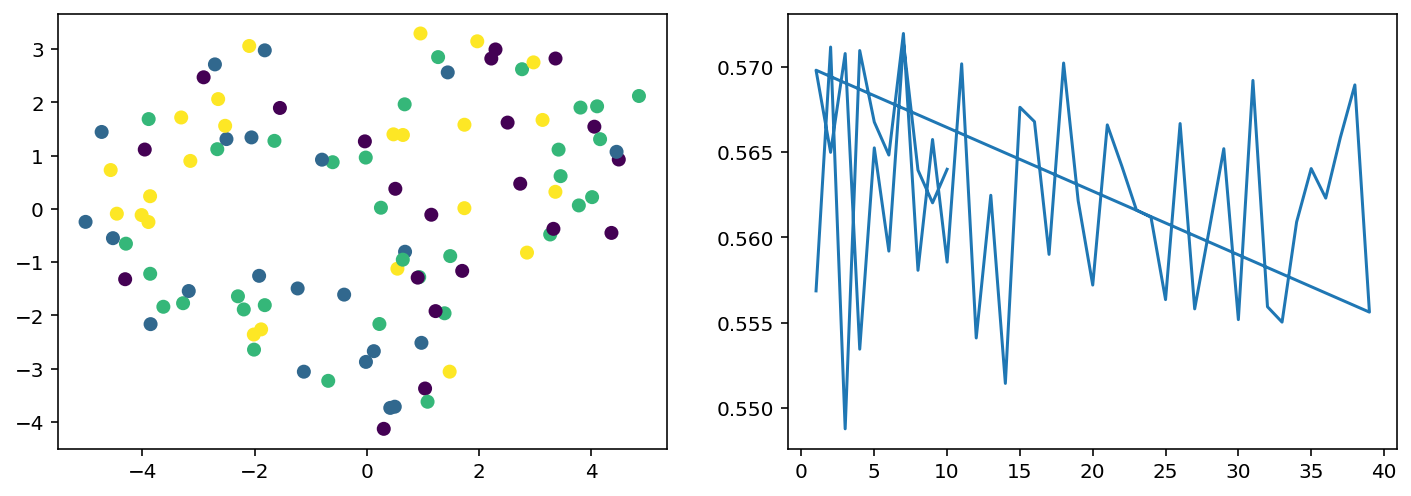

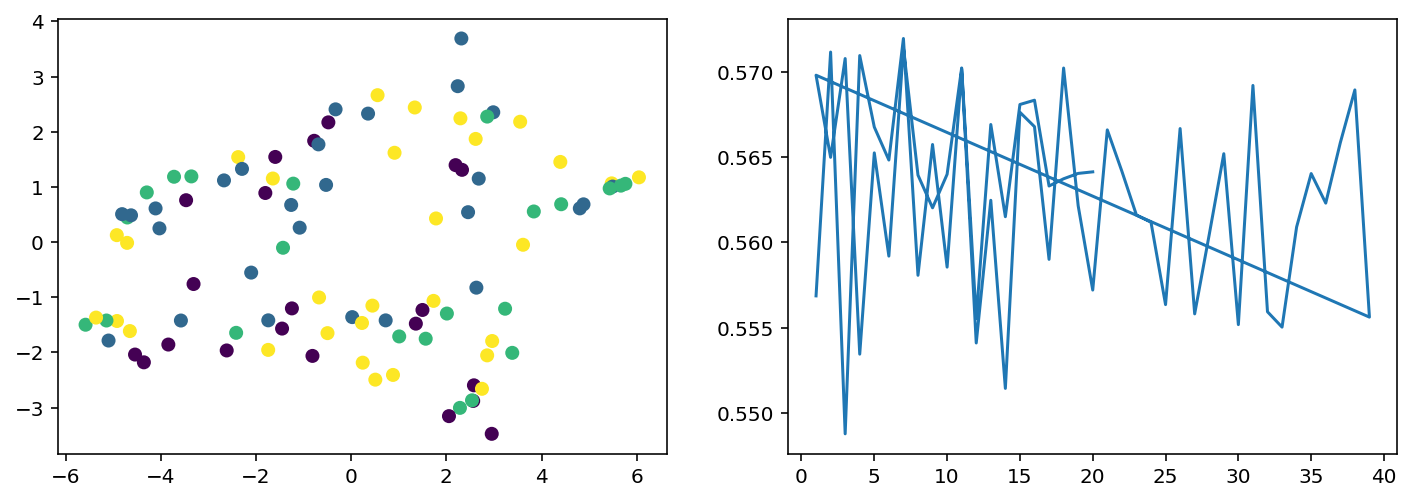

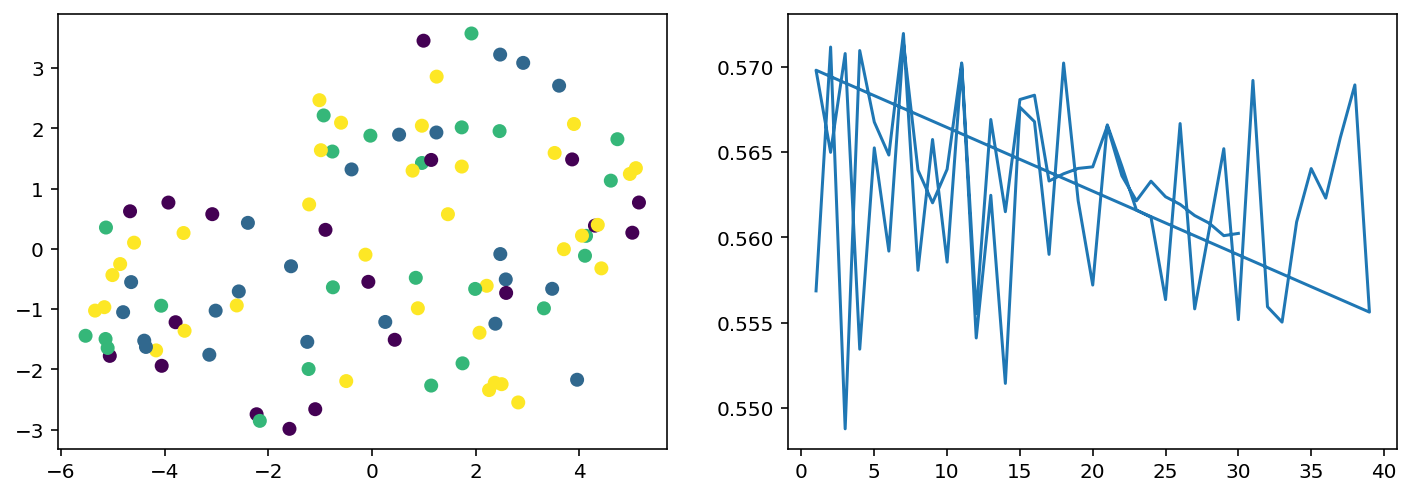

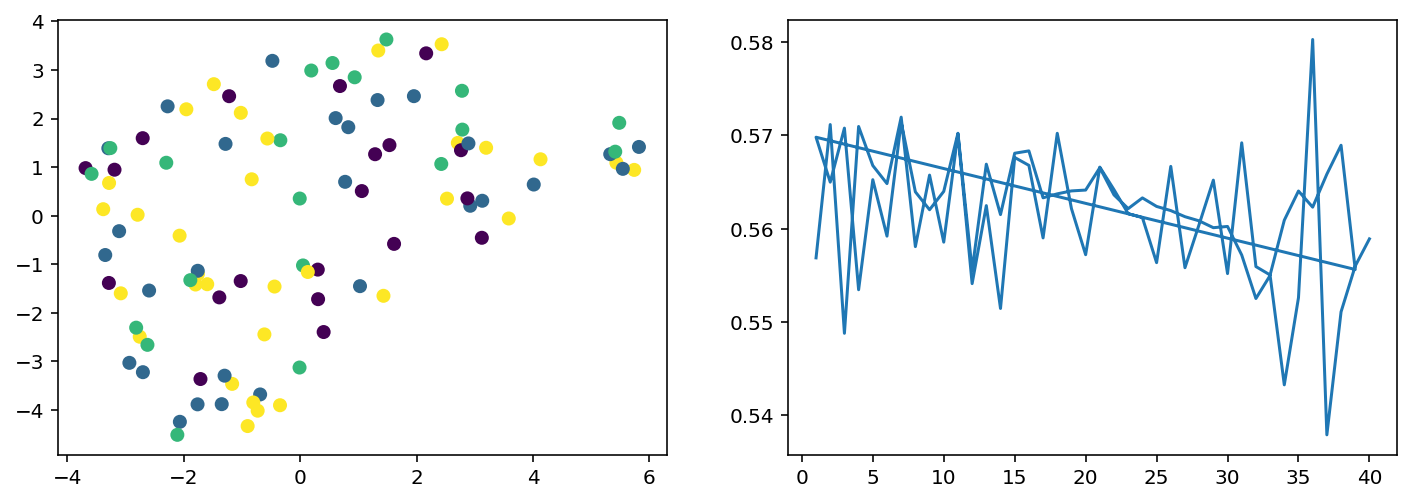

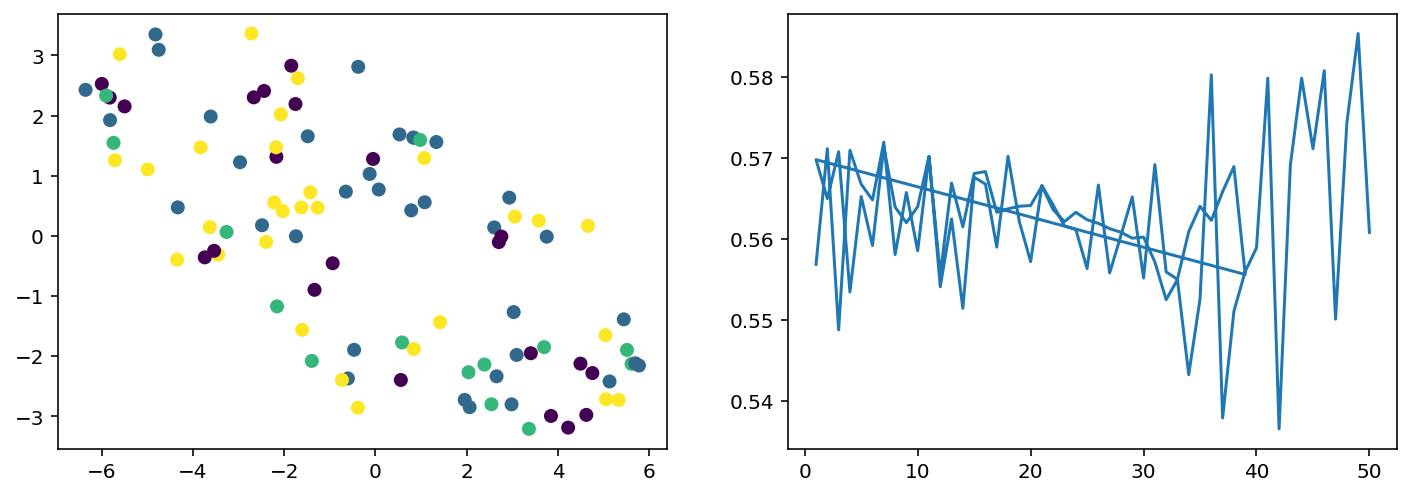

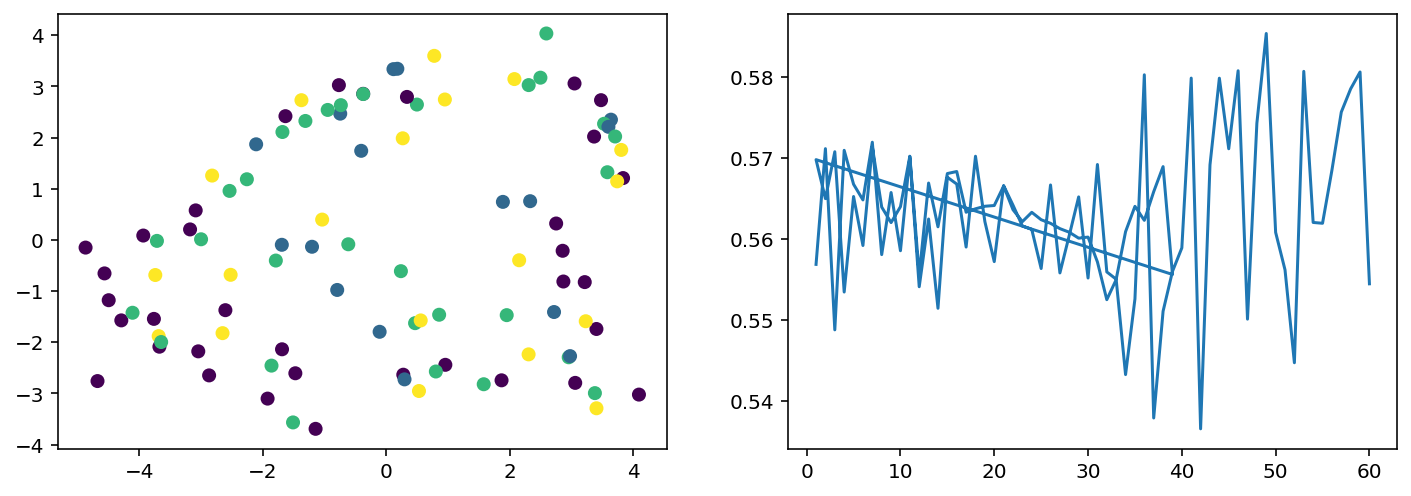

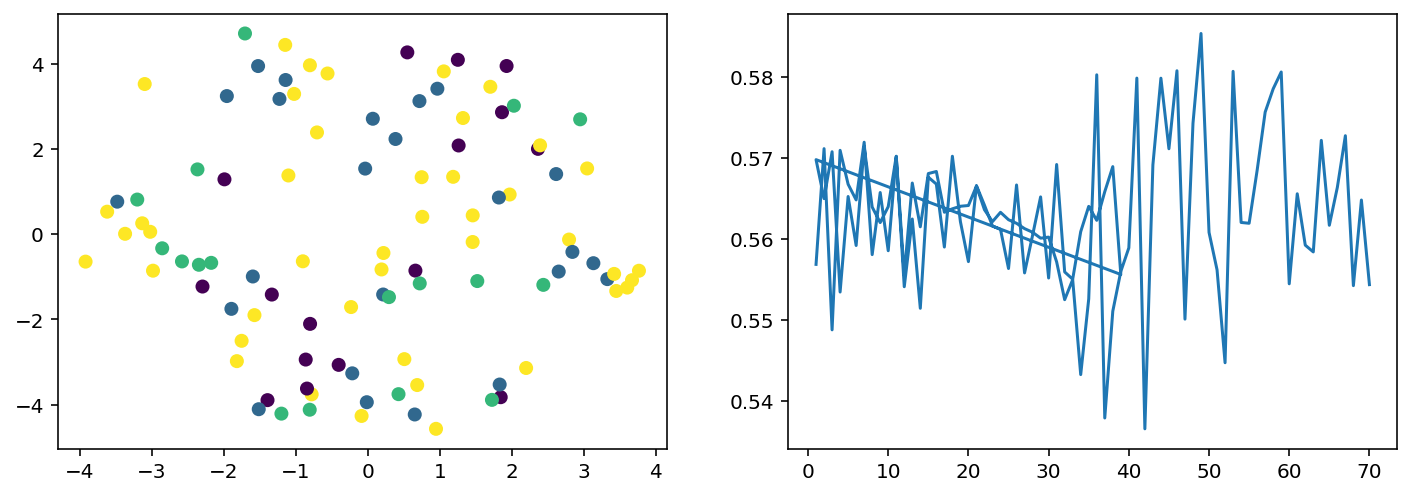

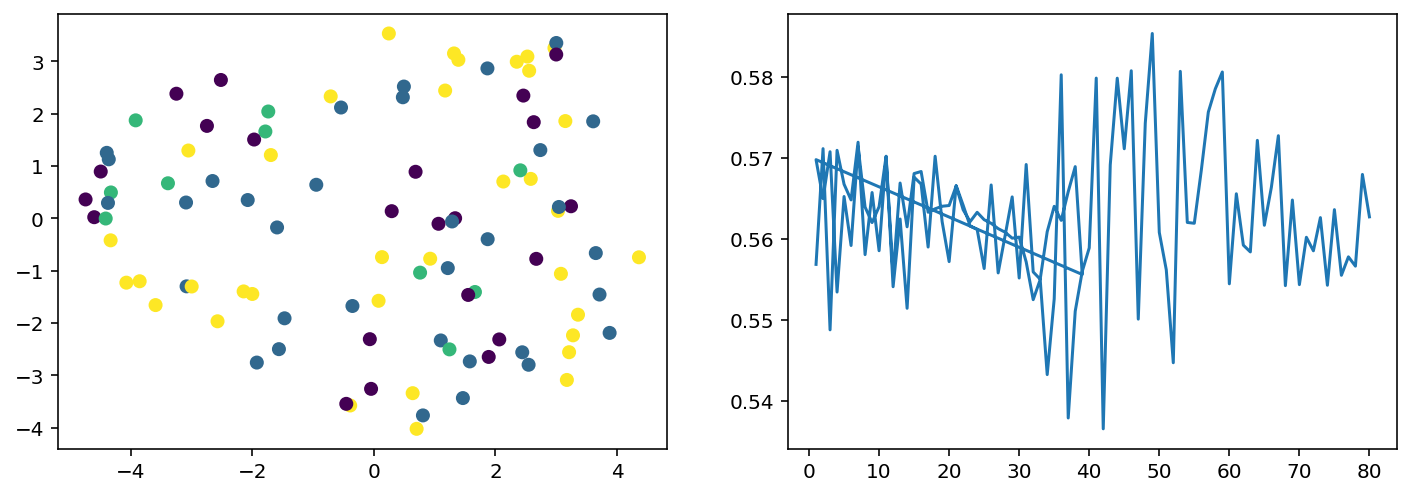

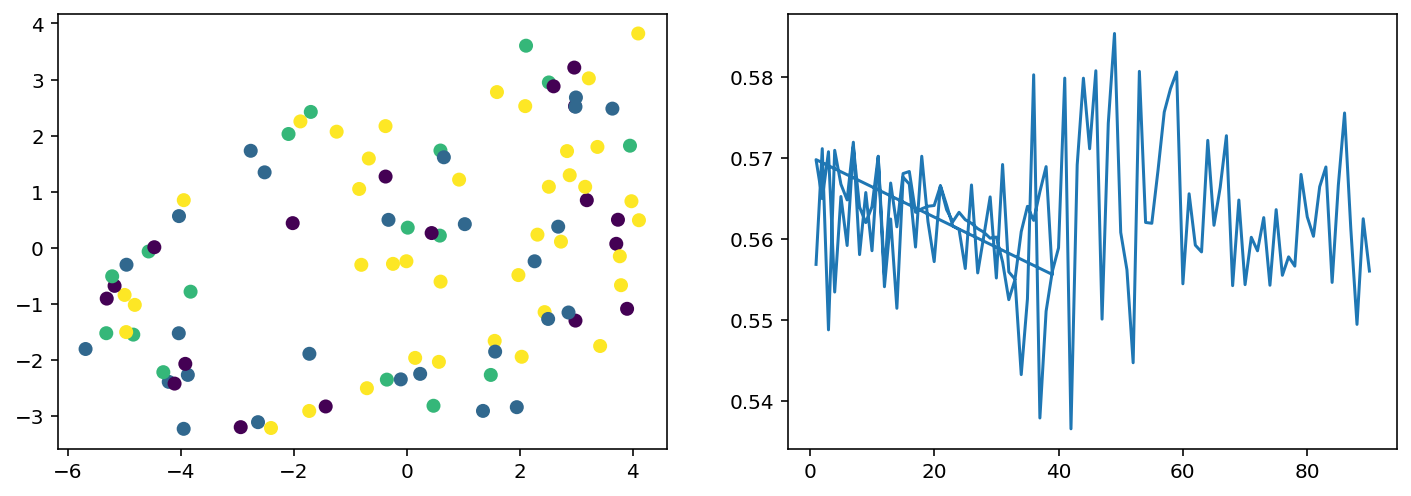

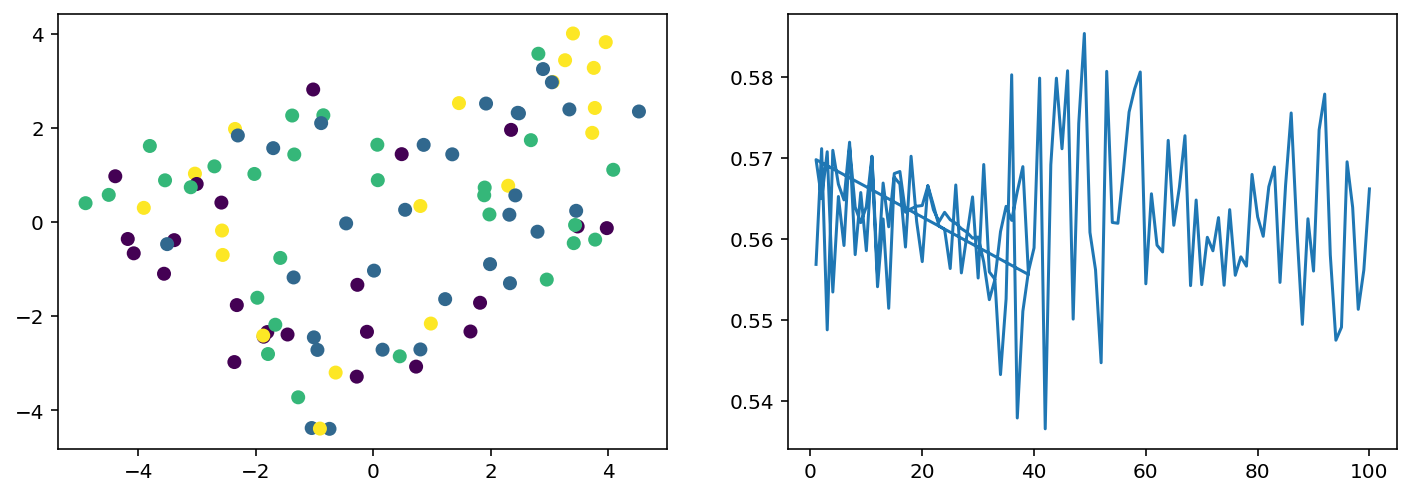

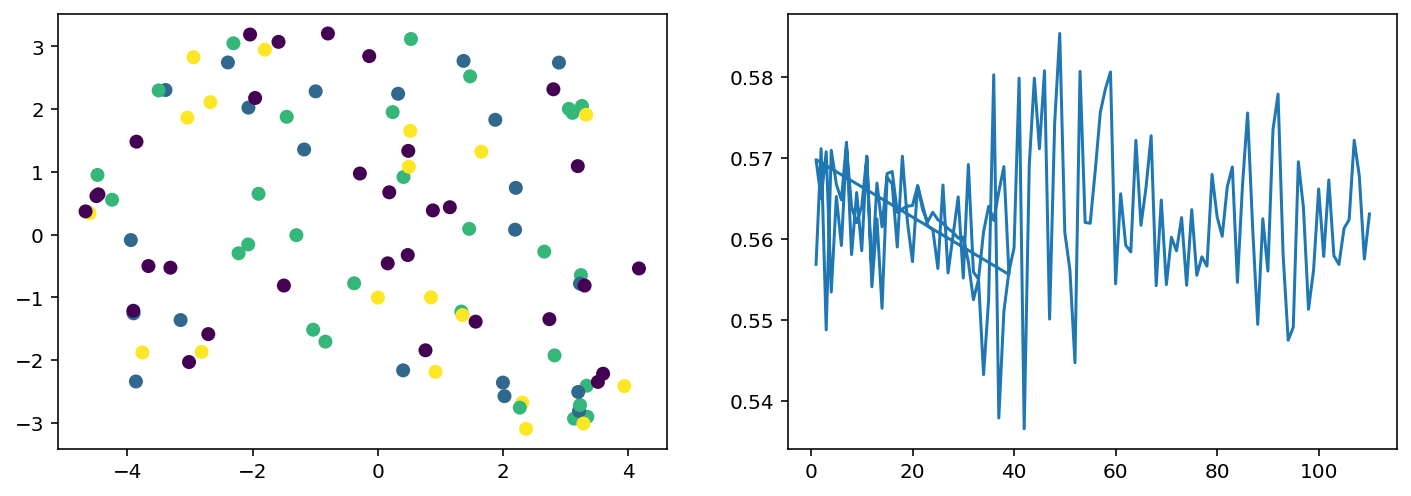

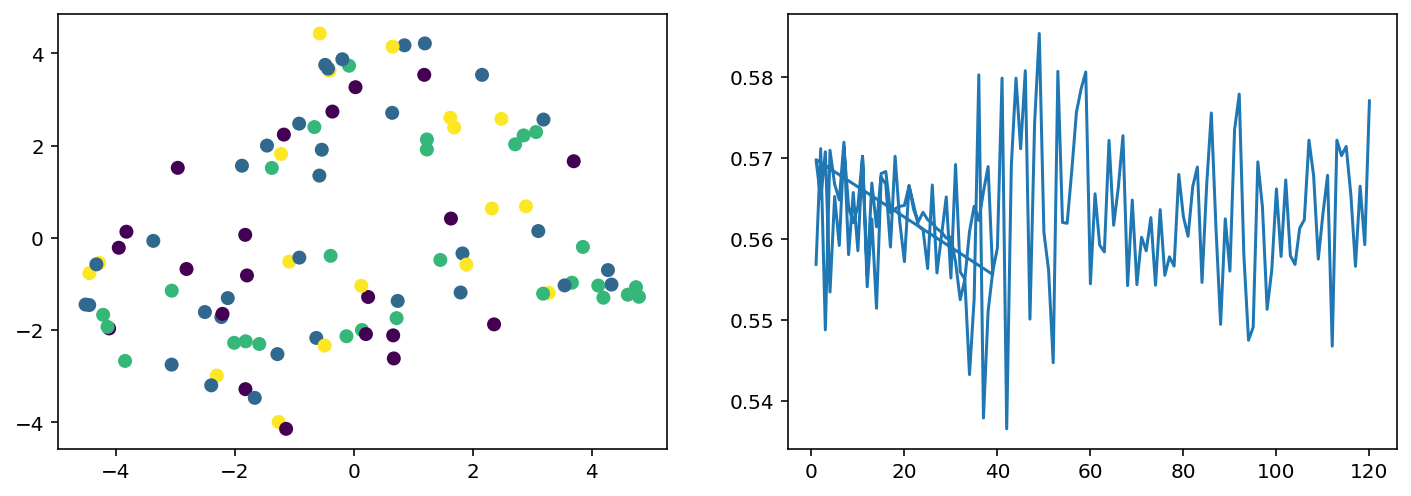

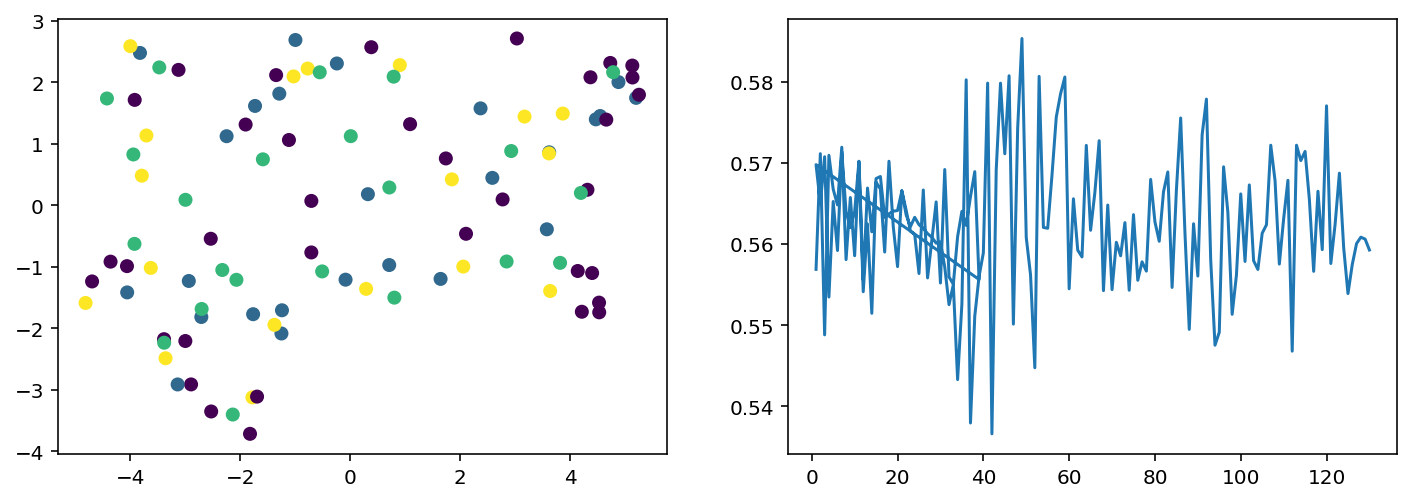

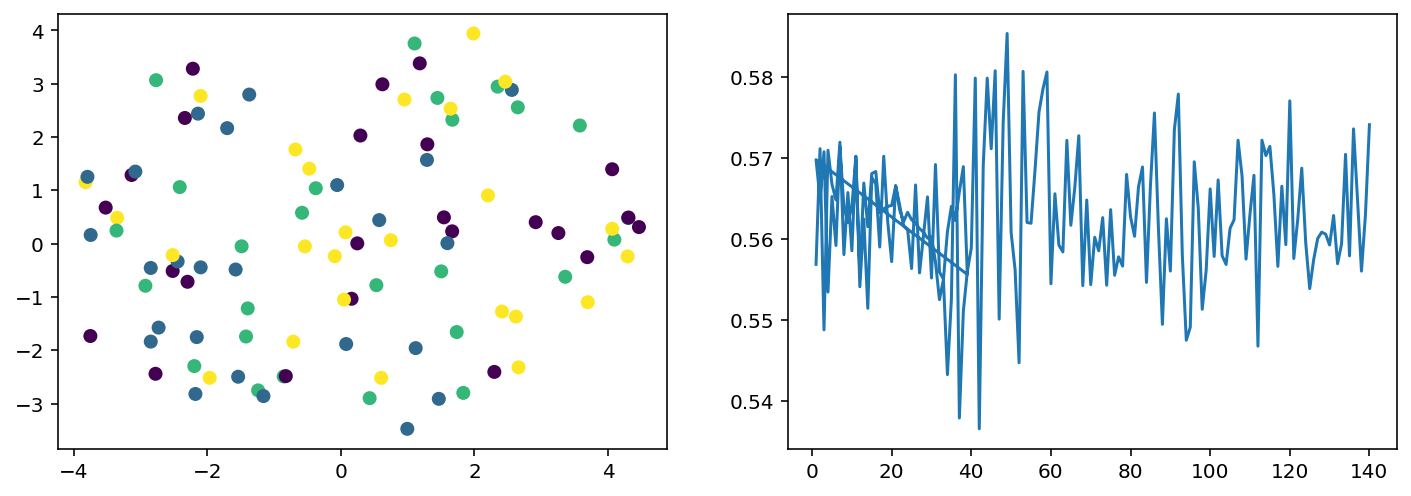

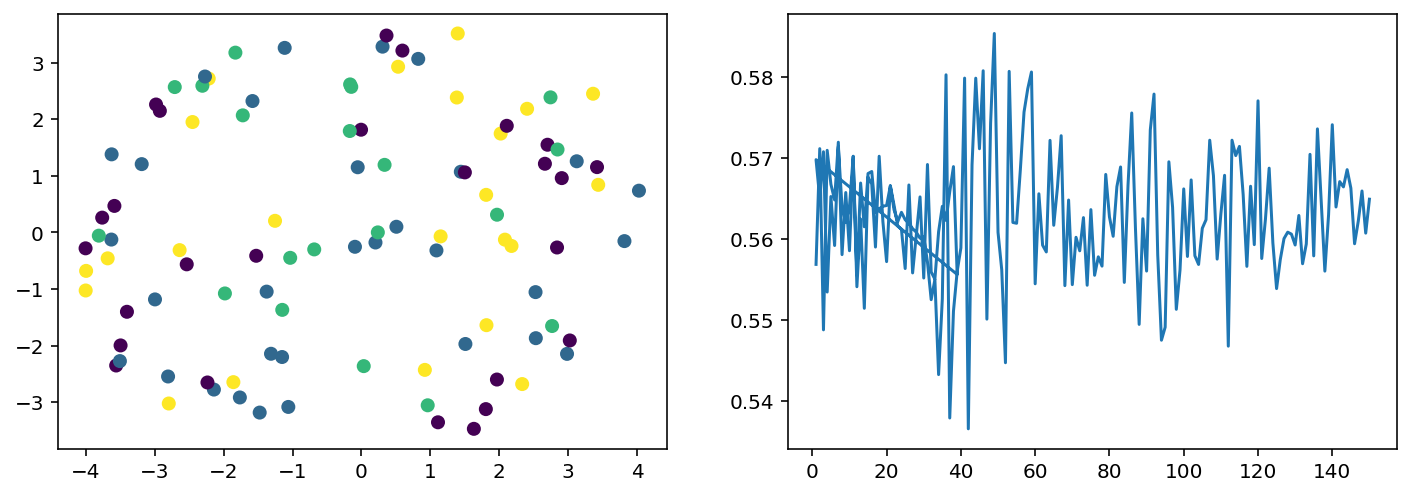

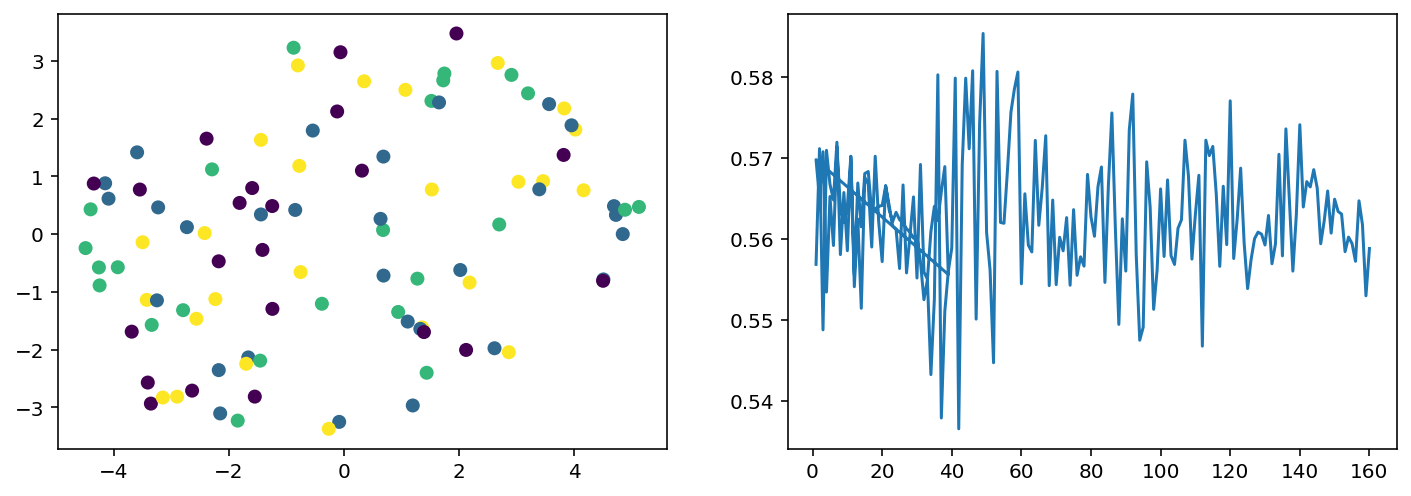

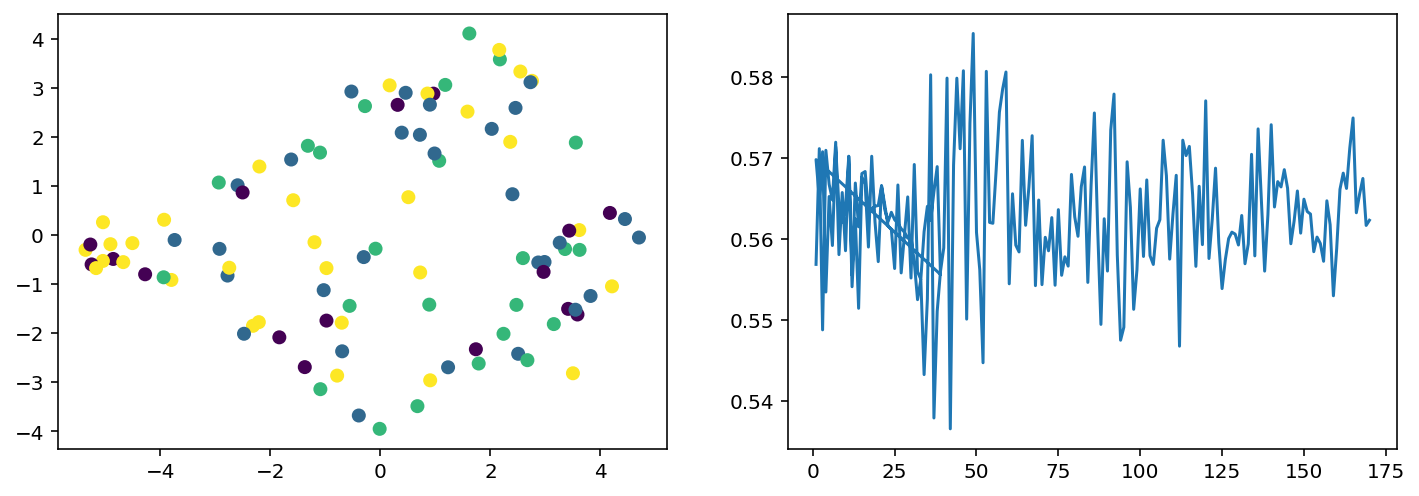

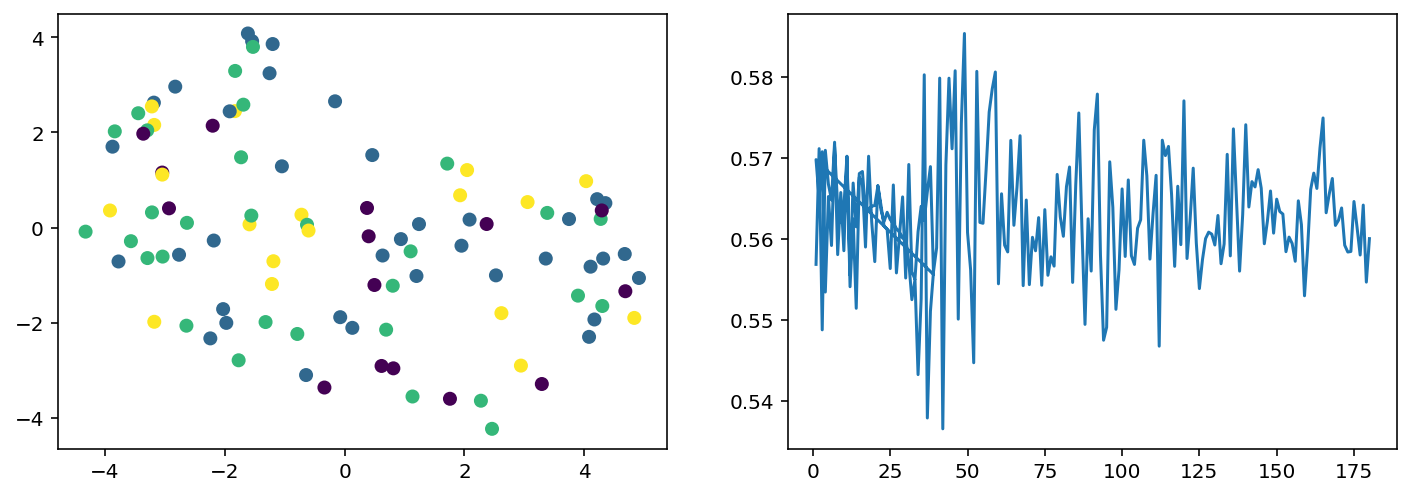

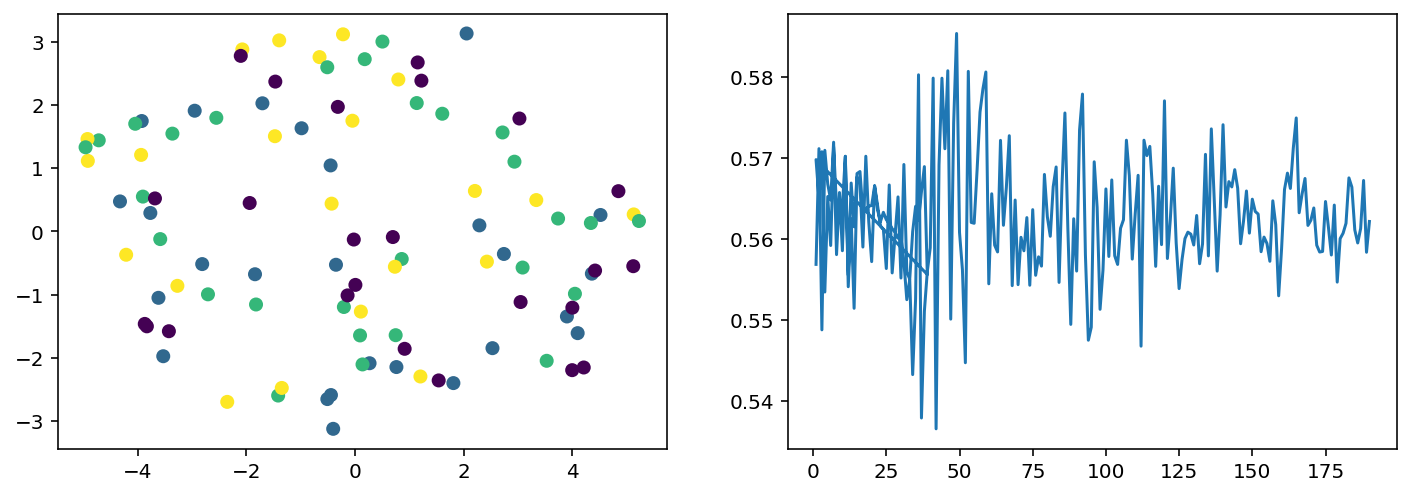

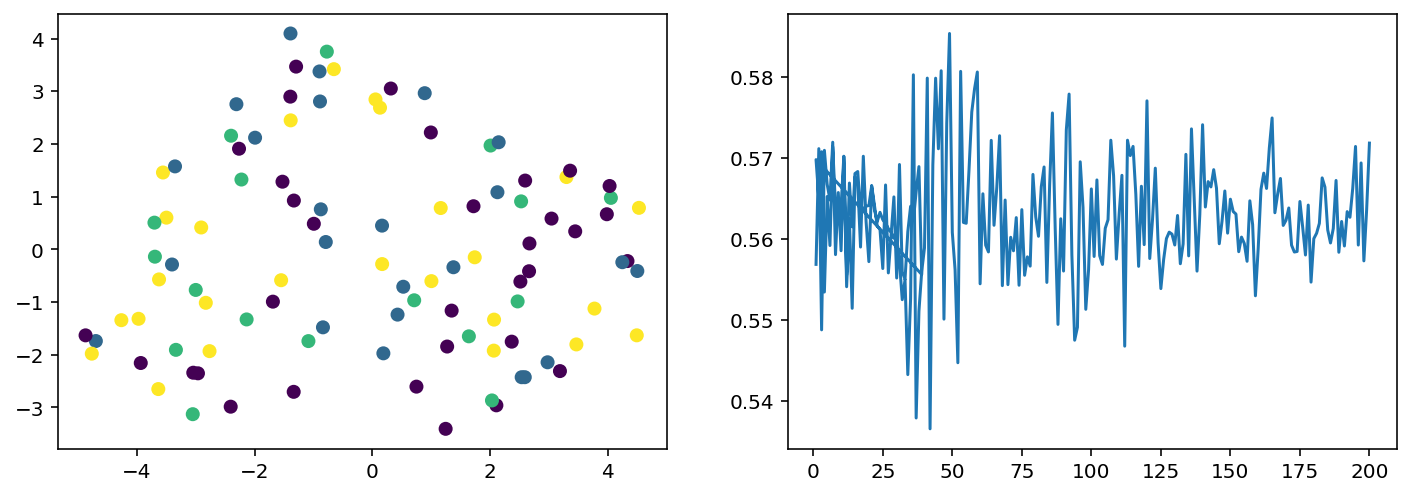

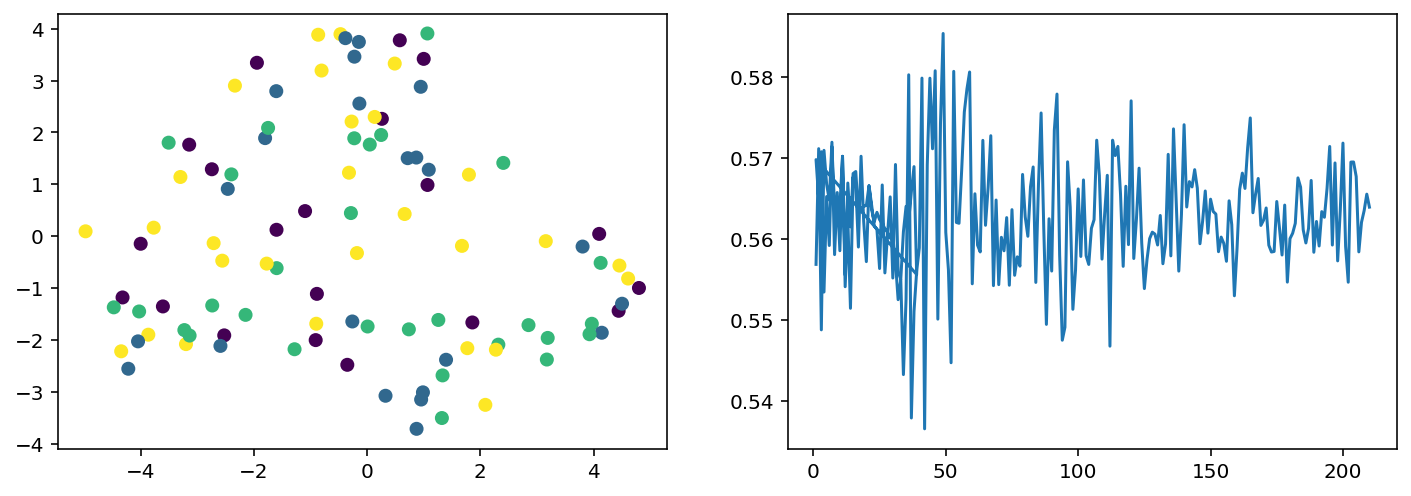

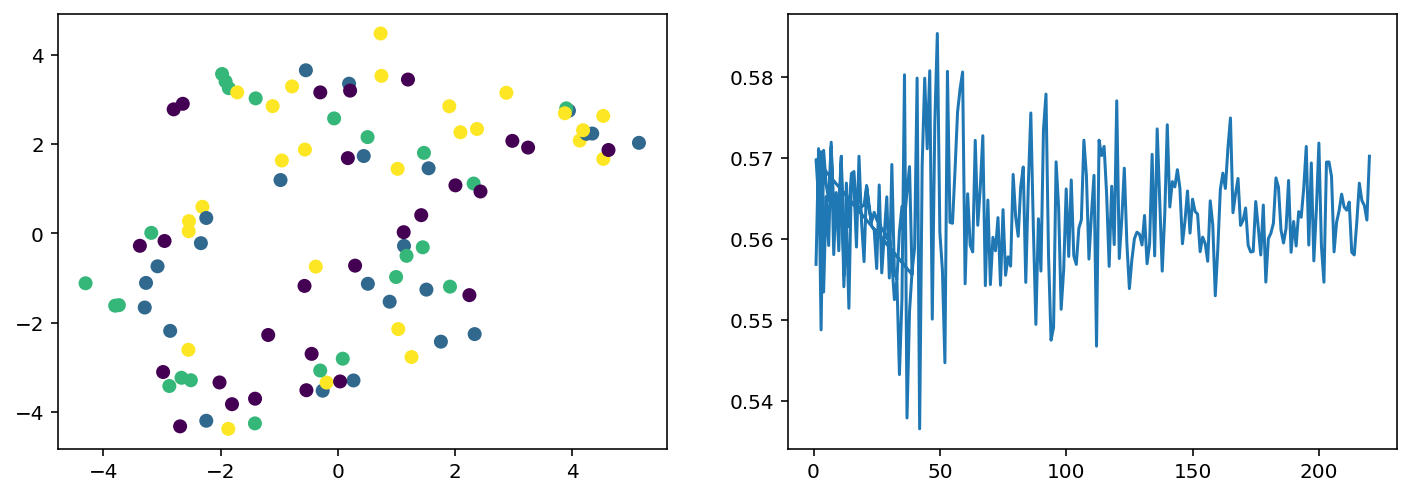

In [125]:
trainer.train()

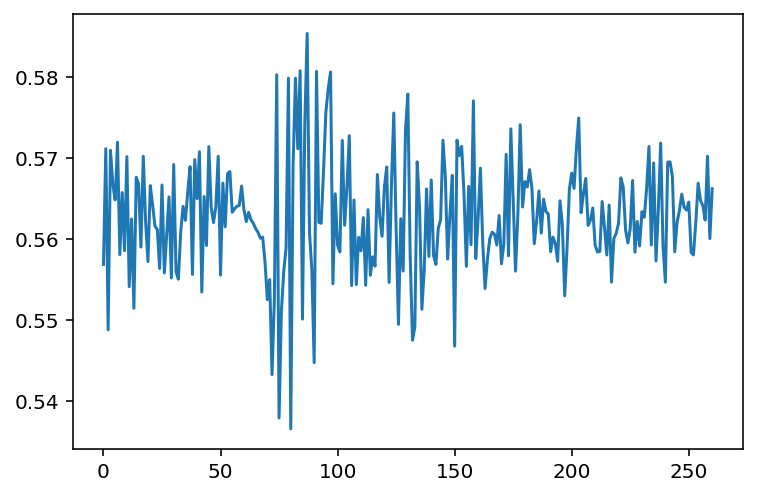

In [127]:
plt.plot(trainer.train_losses)

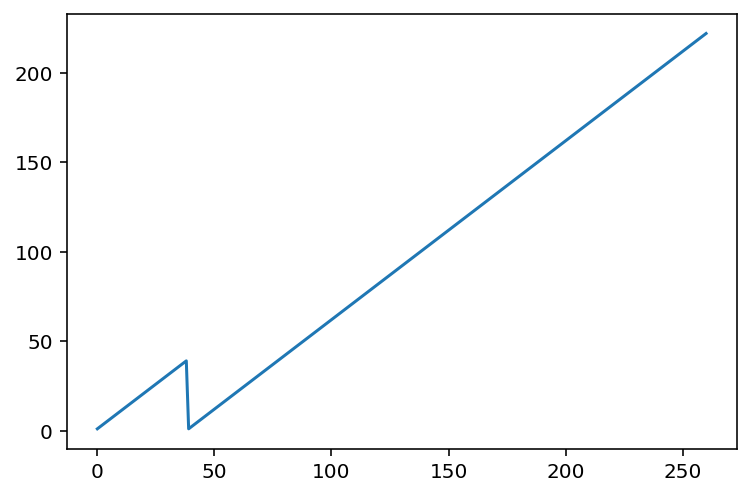

In [128]:
plt.plot(trainer.epochs_arr)